In [1]:
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings as wg
wg.filterwarnings("ignore")

In [2]:
%run ./key.ipynb

In [3]:
# connecting to jump server of twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_key_sec)

In [4]:
# connecting jump server to web server of twitter
auth.set_access_token(access_token,access_token_sec)

In [5]:
# connecting to API Strong Server of Twitter
api = tweepy.API(auth)


In [6]:
keyword = input("Keyword you need analysis on : ")

Keyword you need analysis on : asus


In [7]:
no_of_tweets = 1000
tweets = []
likes = []
time = []

for i in tweepy.Cursor( api.search_tweets,q=keyword, tweet_mode = "extended").items(no_of_tweets):
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)

    
df=pd.DataFrame({'Tweets': tweets, 'Likes':likes,'Time':time})
df

,Tweets,Likes,Time
0,RT @Yodobashi_X: ／\nサイズは最小クラス、性能は最強クラス‼️\n＼\n\...,0,2022-02-19 02:55:47+00:00
1,RT @ASUSJapan: ／\nもうすぐ #ねこの日😻🐱🐈\nASUS Zenfone ...,0,2022-02-19 02:55:38+00:00
2,RT @Yodobashi_X: ／\nサイズは最小クラス、性能は最強クラス‼️\n＼\n\...,0,2022-02-19 02:55:25+00:00
3,RT @Yodobashi_X: ／\nサイズは最小クラス、性能は最強クラス‼️\n＼\n\...,0,2022-02-19 02:55:07+00:00
4,(US)ASUS TUF RTX 3080 Ti OC - $1899.99\nLink: ...,0,2022-02-19 02:55:00+00:00
...,...,...,...
995,@lakumoki @97Smelo @TeamCreedGGs kauf bei mir ...,0,2022-02-18 23:18:05+00:00
996,RT @ASUSJapan: ／\nもうすぐ #ねこの日😻🐱🐈\nASUS Zenfone ...,0,2022-02-18 23:18:00+00:00
997,(CA)ASUS ROG Strix AMD Radeon RX 6600 XT OC - ...,0,2022-02-18 23:17:30+00:00
998,"@Stylexe02 Carte graphique, le Processeur, et ...",1,2022-02-18 23:17:04+00:00


In [8]:
# Clean tweets
import re
def cleanTxt(text):
    text = re.sub(r"@[A-Za-z0-9]+" , '', text)   #remove @mentions
    text = re.sub(r'#', '', text)    #removing "#" symbol
    text = re.sub(r'RT[\s]+', '', text) # removing RT(retweets)
    text = re.sub(r'https?:\/\/\S+', '', text) # remove the hyper link
    
    return text

df["Tweets"]=df["Tweets"].apply(cleanTxt)

df

,Tweets,Likes,Time
0,_X: ／\nサイズは最小クラス、性能は最強クラス‼️\n＼\n\nインテル最新“Alder...,0,2022-02-19 02:55:47+00:00
1,: ／\nもうすぐ ねこの日😻🐱🐈\nASUS Zenfone 8が抽選で1名様に当たる🎁\...,0,2022-02-19 02:55:38+00:00
2,_X: ／\nサイズは最小クラス、性能は最強クラス‼️\n＼\n\nインテル最新“Alder...,0,2022-02-19 02:55:25+00:00
3,_X: ／\nサイズは最小クラス、性能は最強クラス‼️\n＼\n\nインテル最新“Alder...,0,2022-02-19 02:55:07+00:00
4,(US)ASUS TUF RTX 3080 Ti OC - $1899.99\nLink: ...,0,2022-02-19 02:55:00+00:00
...,...,...,...
995,kauf bei mir unban pack not working on asus...,0,2022-02-18 23:18:05+00:00
996,: ／\nもうすぐ ねこの日😻🐱🐈\nASUS Zenfone 8が抽選で1名様に当たる🎁\...,0,2022-02-18 23:18:00+00:00
997,(CA)ASUS ROG Strix AMD Radeon RX 6600 XT OC - ...,0,2022-02-18 23:17:30+00:00
998,"Carte graphique, le Processeur, et la carte m...",1,2022-02-18 23:17:04+00:00


In [9]:
from textblob import TextBlob
#Creating a function to get subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Creating  a function to get the polarity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Creating two new columns

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Likes,Time,Subjectivity,Polarity
0,_X: ／\nサイズは最小クラス、性能は最強クラス‼️\n＼\n\nインテル最新“Alder...,0,2022-02-19 02:55:47+00:00,0.000,0.000
1,: ／\nもうすぐ ねこの日😻🐱🐈\nASUS Zenfone 8が抽選で1名様に当たる🎁\...,0,2022-02-19 02:55:38+00:00,0.000,0.000
2,_X: ／\nサイズは最小クラス、性能は最強クラス‼️\n＼\n\nインテル最新“Alder...,0,2022-02-19 02:55:25+00:00,0.000,0.000
3,_X: ／\nサイズは最小クラス、性能は最強クラス‼️\n＼\n\nインテル最新“Alder...,0,2022-02-19 02:55:07+00:00,0.000,0.000
4,(US)ASUS TUF RTX 3080 Ti OC - $1899.99\nLink: ...,0,2022-02-19 02:55:00+00:00,0.000,0.000
...,...,...,...,...,...
995,kauf bei mir unban pack not working on asus...,0,2022-02-18 23:18:05+00:00,0.000,0.000
996,: ／\nもうすぐ ねこの日😻🐱🐈\nASUS Zenfone 8が抽選で1名様に当たる🎁\...,0,2022-02-18 23:18:00+00:00,0.000,0.000
997,(CA)ASUS ROG Strix AMD Radeon RX 6600 XT OC - ...,0,2022-02-18 23:17:30+00:00,0.375,-0.125
998,"Carte graphique, le Processeur, et la carte m...",1,2022-02-18 23:17:04+00:00,0.000,0.000


In [10]:
# Creating  a function to compute the positive , negative and neutral analysis

def getAnalysis(score):
    if score>0:
        return 'Positive'
    elif score == 0 :
        return 'Neutral'
    else:
        return 'Negative'

df['Analysis']= df['Polarity'].apply(getAnalysis)
df

,Tweets,Likes,Time,Subjectivity,Polarity,Analysis
0,_X: ／\nサイズは最小クラス、性能は最強クラス‼️\n＼\n\nインテル最新“Alder...,0,2022-02-19 02:55:47+00:00,0.000,0.000,Neutral
1,: ／\nもうすぐ ねこの日😻🐱🐈\nASUS Zenfone 8が抽選で1名様に当たる🎁\...,0,2022-02-19 02:55:38+00:00,0.000,0.000,Neutral
2,_X: ／\nサイズは最小クラス、性能は最強クラス‼️\n＼\n\nインテル最新“Alder...,0,2022-02-19 02:55:25+00:00,0.000,0.000,Neutral
3,_X: ／\nサイズは最小クラス、性能は最強クラス‼️\n＼\n\nインテル最新“Alder...,0,2022-02-19 02:55:07+00:00,0.000,0.000,Neutral
4,(US)ASUS TUF RTX 3080 Ti OC - $1899.99\nLink: ...,0,2022-02-19 02:55:00+00:00,0.000,0.000,Neutral
...,...,...,...,...,...,...
995,kauf bei mir unban pack not working on asus...,0,2022-02-18 23:18:05+00:00,0.000,0.000,Neutral
996,: ／\nもうすぐ ねこの日😻🐱🐈\nASUS Zenfone 8が抽選で1名様に当たる🎁\...,0,2022-02-18 23:18:00+00:00,0.000,0.000,Neutral
997,(CA)ASUS ROG Strix AMD Radeon RX 6600 XT OC - ...,0,2022-02-18 23:17:30+00:00,0.375,-0.125,Negative
998,"Carte graphique, le Processeur, et la carte m...",1,2022-02-18 23:17:04+00:00,0.000,0.000,Neutral


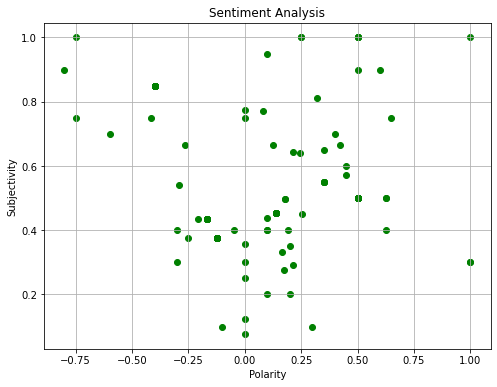

In [11]:
# ploting the polarity and subjectivity

plt.figure(figsize=(8,6))
for i in range (0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color = 'Green')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid()
plt.show()

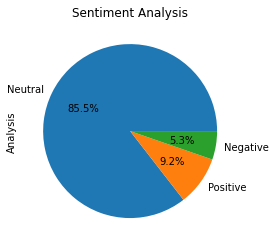

In [12]:
# Showing the value count 
df['Analysis'].value_counts()

#ploting and visualizing the value count

plt.title('Sentiment Analysis')
df['Analysis'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()